In [33]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
from matplotlib import rcParams
rcParams['font.family'] = 'Arial'
rcParams['pdf.fonttype'] = 42  # Use TrueType fonts
rcParams['axes.linewidth'] = 0.5
rcParams['xtick.major.width'] = 0.5
rcParams['ytick.major.width'] = 0.5

In [35]:
import sys
import os
import pandas as pd
import numpy as np
from os.path import join as pjoin

from catrace.stats import sort_conditions, pool_training_conditions
from catrace.visualize import plot_measure, plot_all_measures

paper_fig_dir = '/tungstenfs/scratch/gfriedri/hubo/Dp_manifold/figures_for_paper/juvenile/capacity'
dataset_name = 'juvenile'

In [36]:
measure_names = ['capacity', 'radius', 'dimension', 'axis_alignment', 'center_alignment', 'center_axis_alignment']
align_measure_names = ['axis_alignment', 'center_alignment', 'center_axis_alignment']


## Juvenile

In [37]:
import sys
import os
import pandas as pd
from os.path import join as pjoin

from catrace.dataset import DatasetConfig
from catrace.utils import load_config

from catrace.dataset import load_dataset_config
data_version_tag = '_dataversion_juvenile_v2_long_preonset_firing_rate'
window = [32, 85] #[38, 76]#[36, 74]#[36, 70]#[38, 68]#[36, 70] #[32, 55]#[32, 70]#[62, 85]#[55, 78]#[47,70]#[40, 63]#[47, 70]#[40, 63]#[32,55]#[23, 78]#[38, 75]#[40, 63] #[32, 85]#[47, 70]#[40, 63] #[32, 85]#[38, 61]
seed = 8787 #9991#326#2345
window_key = f'window_{window[0]}_{window[1]}'
N=700 # number of neurons
# M = 100 # number of data points
M = 140
#M=90

dsconfig= load_dataset_config(f'../juvenile_dataset_without14mm_phearg.json')
capacity_dir = '/tungstenfs/scratch/gfriedri/hubo/Dp_manifold/juvenile_dataset/results/capacity'

jobname = f'capacity_sweep_{window_key}_N{N}_M{M}_master_seed{seed}'
# Load the capacity dataframe
import pandas as pd

input_dir = pjoin(capacity_dir, jobname)
exp_list = dsconfig.exp_list
conditions = dsconfig.conditions

# If file exists, load it
df_result_file = pjoin(input_dir, f'df_result.pkl')
df_result = pd.read_pickle(df_result_file)


In [38]:

df_per_fish_juv = df_result.xs(False, level='shuffle').groupby(['fish_id', 'condition', 'odor1', 'odor2'], sort=False).mean()
df_per_fish_juv_shuffled = df_result.xs(True, level='shuffle').groupby(['fish_id', 'condition', 'odor1', 'odor2'], sort=False).mean()

juv_conditions =  ['naive', 'arg-phe', 'phe-arg', 'phe-trp']
cond_mapping = {'naive': 'naive', 'phe-arg': 'trained', 'arg-phe': 'trained', 'phe-trp': 'trained'}
conditions_pooled = ['naive', 'trained']

df_pooled = pool_training_conditions(df_per_fish_juv, cond_mapping)

df_pooled_shuffled = pool_training_conditions(df_per_fish_juv_shuffled, cond_mapping)


## Juvenile

### AvsA, AvsB, BvsB


In [39]:
vsdict = {
    'AvsA': (['Phe', 'Trp', 'Arg'], ['Phe', 'Trp', 'Arg']),
    'AvsB': (['Phe', 'Trp', 'Arg'], ['TDCA', 'TCA', 'GCA']),
    'BvsB': (['TDCA', 'TCA', 'GCA'], ['TDCA', 'TCA', 'GCA']),
}

from capacity_utils import get_per_vs
vsdff = get_per_vs(vsdict, df_pooled)
vsdff


[('Arg', 'Phe'), ('Arg', 'Trp'), ('Phe', 'Trp')]
[('TCA', 'Trp'), ('Arg', 'TCA'), ('Phe', 'TDCA'), ('Phe', 'TCA'), ('Arg', 'GCA'), ('GCA', 'Phe'), ('TDCA', 'Trp'), ('GCA', 'Trp'), ('Arg', 'TDCA')]
[('GCA', 'TCA'), ('TCA', 'TDCA'), ('GCA', 'TDCA')]


capacity  dimension  \
vsname fish_id                   odor1 odor2 condition                        
AvsA   2021-07-15-DpOBEM-N2_Dp   Phe   Trp   naive      0.091146  18.357397   
                                 Arg   Phe   naive      0.091595  18.097620   
                                       Trp   naive      0.101336  16.770618   
       2021-07-16-DpOBEM-N3_Dp   Phe   Trp   naive      0.091631  17.647169   
                                 Arg   Phe   naive      0.089230  17.973010   
...                                                          ...        ...   
BvsB   2021-11-27-DpOBEM-JH24_Dp GCA   TDCA  trained    0.095427  19.353949   
                                       TCA   trained    0.096314  19.161294   
       2021-11-26-DpOBEM-JH24_Dp TCA   TDCA  trained    0.091347  18.717724   
                                 GCA   TDCA  trained    0.092721  18.308848   
                                       TCA   trained    0.089808  19.050959   

                                                          radius   utility  \
vsname fish_id                   odor1 odor2 condition                       
AvsA   2021-07-15-DpOBEM-N2_Dp   Phe   Trp   naive      1.029072  0.859920   
                                 Arg   Phe   naive      1.033335  0.855543   
                                       Trp   naive      0.992802  0.843043   
       2021-07-16-DpOBEM-N3_Dp   Phe   Trp   naive      1.014662  0.819611   
                                 Arg   Phe   naive      1.036878  0.830340   
...                                                          ...       ...   
BvsB   2021-11-27-DpOBEM-JH24_Dp GCA   TDCA  trained    0.967349  0.891971   
                                       TCA   trained    0.965884  0.889990   
       2021-11-26-DpOBEM-JH24_Dp TCA   TDCA  trained    1.024339  0.874382   
                                 GCA   TDCA  trained    1.020876  0.865401   
                                       TCA   trained    1.026170  0.876804   

                                                        center_alignment  \
vsname fish_id                   odor1 odor2 condition                     
AvsA   2021-07-15-DpOBEM-N2_Dp   Phe   Trp   naive              0.860890   
                                 Arg   Phe   naive              0.873911   
                                       Trp   naive              0.832948   
       2021-07-16-DpOBEM-N3_Dp   Phe   Trp   naive              0.894544   
                                 Arg   Phe   naive              0.901409   
...                                                                  ...   
BvsB   2021-11-27-DpOBEM-JH24_Dp GCA   TDCA  trained            0.856604   
                                       TCA   trained            0.852305   
       2021-11-26-DpOBEM-JH24_Dp TCA   TDCA  trained            0.872574   
                                 GCA   TDCA  trained            0.870684   
                                       TCA   trained            0.881753   

                                                        axis_alignment  \
vsname fish_id                   odor1 odor2 condition                   
AvsA   2021-07-15-DpOBEM-N2_Dp   Phe   Trp   naive            0.138282   
                                 Arg   Phe   naive            0.135986   
                                       Trp   naive            0.123637   
       2021-07-16-DpOBEM-N3_Dp   Phe   Trp   naive            0.184497   
                                 Arg   Phe   naive            0.173495   
...                                                                ...   
BvsB   2021-11-27-DpOBEM-JH24_Dp GCA   TDCA  trained          0.077444   
                                       TCA   trained          0.075074   
       2021-11-26-DpOBEM-JH24_Dp TCA   TDCA  trained          0.129718   
                                 GCA   TDCA  trained          0.138969   
                                       TCA   trained          0.141055   

                                                        cente

/tungstenfs/scratch/gfriedri/hubo/Ca_imaging/scripts/catrace/catrace/visualize.py:624: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_points = datadf.groupby(
/tmp/ipykernel_2724321/2750577655.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_xtick_labels)
/tungstenfs/scratch/gfriedri/hubo/Ca_imaging/scripts/catrace/catrace/visualize.py:624: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_points = datadf.groupby(
/tmp/ipykernel_2724321/2750577655.py:37: UserWarning: set_ticklabels() should only

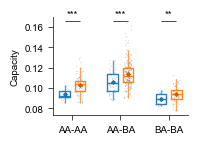

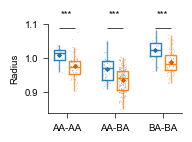

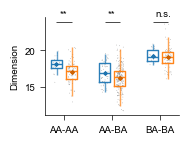

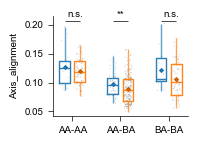

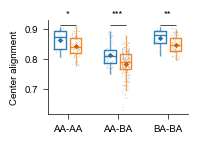

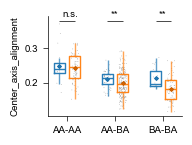

In [40]:
from catrace.visualize import (plot_measure_multi_odor_cond,
                               PlotBoxplotMultiOdorCondParams,
                               set_yticks_interval)
from catrace.for_paper import save_figure_for_paper, save_stats_json


def plot_measure_multi_vs(measure_name):
    plot_box_multi_params = PlotBoxplotMultiOdorCondParams(
        figsize=(2.9, 1.55),
        label_fontsize=7,
        show_ns=True,
        strip_size=0.5,
        mean_marker_size=0.7,
        box_linewidth=1,
        pvalue_marker_xoffset=0.05,
        pvalue_bar_linewidth=0.5,
    )
    fig, ax, test_results = plot_measure_multi_odor_cond(vsdff, measure_name, odor_name='vsname', condition_name='condition', params=plot_box_multi_params)

    # set_yticks_interval(ax, 0.05)
    ylabel = ax.get_ylabel().capitalize()
    ax.set_ylabel(ylabel, fontsize=7)

    if ylabel == 'Axes_alignment':
        new_ylabel = 'Axes alignment'
        ax.set_ylabel(new_ylabel)
    elif ylabel == 'Center_alignment':
        new_ylabel = 'Center alignment'
        ax.set_ylabel(new_ylabel)
    elif ylabel == 'Center_axes_alignment':
        new_ylabel = 'Center-axes alignment'
        ax.set_ylabel(new_ylabel)
    
    xtick_labels = ax.get_xticklabels()
    mapping = {'AvsA': 'AA-AA', 'AvsB': 'AA-BA', 'BvsB': 'BA-BA'}
    new_xtick_labels = [mapping[label.get_text()] for label in xtick_labels]
    ax.set_xticklabels(new_xtick_labels)

    if ax.get_legend() is not None:
        ax.get_legend().remove()

    figname = f'{dataset_name}_{measure_name}_vsname'
    save_figure_for_paper(fig, figname, paper_fig_dir)
    # save_stats_json(test_results, figname, paper_fig_dir, tuple_key_to_str=True)  
    return test_results

test_results_dict = {}
for measure_name in measure_names:
    test_results = plot_measure_multi_vs(measure_name)
    test_results_dict[measure_name] = test_results

In [41]:
from catrace.stats import format_test_results_multi_odor_two_cond

for measure_name, test_results in test_results_dict.items():
    sentence = format_test_results_multi_odor_two_cond(test_results)
    print(measure_name)
    print(sentence)


capacity
For AvsA, Comparing naive (mean = 0.09381 ± 0.005575, n = 18) vs trained (mean = 0.1030 ± 0.009709, n = 75): Mann–Whitney U test, U = 267.00, P = 7.4 × 10^-5. For AvsB, Comparing naive (mean = 0.1054 ± 0.01070, n = 54) vs trained (mean = 0.1140 ± 0.01295, n = 225): Mann–Whitney U test, U = 3785.00, P = 1.7 × 10^-5. For BvsB, Comparing naive (mean = 0.08885 ± 0.005462, n = 18) vs trained (mean = 0.09390 ± 0.007620, n = 75): Mann–Whitney U test, U = 405.00, P = 0.009.
radius
For AvsA, Comparing naive (mean = 1.007 ± 0.02364, n = 18) vs trained (mean = 0.9752 ± 0.03409, n = 75): Mann–Whitney U test, U = 1077.00, P = 9.4 × 10^-5. For AvsB, Comparing naive (mean = 0.9668 ± 0.03323, n = 54) vs trained (mean = 0.9343 ± 0.03476, n = 225): Mann–Whitney U test, U = 8936.00, P = 7.8 × 10^-8. For BvsB, Comparing naive (mean = 1.022 ± 0.03227, n = 18) vs trained (mean = 0.9876 ± 0.03286, n = 75): Mann–Whitney U test, U = 1035.00, P = 0.0005.
dimension
For AvsA, Comparing naive (mean = 18.1

In [42]:
vsdff_naive = vsdff.xs('naive', level='condition')
vsdff_trained = vsdff.xs('trained', level='condition')
vsdff_naive
measure_name = 'capacity'
from catrace.stats import apply_test_by_cond
vs_test_naive = apply_test_by_cond(vsdff_naive, measure_name, cond_name='vsname', return_all_pairs=True)
vs_test_trained = apply_test_by_cond(vsdff_trained, measure_name, cond_name='vsname', return_all_pairs=True)

  Contrast     A     B  Paired  Parametric         T        dof alternative  \
0   vsname  AvsA  AvsB   False        True -5.931278  56.873118   two-sided   
1   vsname  AvsA  BvsB   False        True  2.696099  34.000000   two-sided   
2   vsname  AvsB  BvsB   False        True  8.537178  57.910660   two-sided   

          p-unc       BF10    hedges  
0  1.876023e-07  1.002e+05 -1.185521  
1  1.083059e-02      4.719  0.878728  
2  7.849247e-12  2.732e+09  1.693691  
  Contrast     A     B  Paired  Parametric          T         dof alternative  \
0   vsname  AvsA  AvsB   False        True  -7.774766  168.197359   two-sided   
1   vsname  AvsA  BvsB   False        True   6.403209  148.000000   two-sided   
2   vsname  AvsB  BvsB   False        True  16.328583  218.184158   two-sided   

          p-unc       BF10    hedges  
0  7.188128e-13  4.777e+10 -0.897694  
1  1.901192e-09  4.869e+06  1.040332  
2  1.079155e-39  4.513e+39  1.694165  


In [43]:
vs_test_naive

{'Kruskal': {'statistic': 37.31542531542527,
  'p_value': 7.88966108740573e-09,
  'n': {'AvsA': 18, 'AvsB': 54, 'BvsB': 18}},
 'mean': {'AvsA': 0.09380832783166276,
  'AvsB': 0.10544107752741104,
  'BvsB': 0.0888486607056318},
 'std': {'AvsA': 0.005574809667216111,
  'AvsB': 0.010699377953567133,
  'BvsB': 0.005462044799652567},
 'Dunn_all_pairs': {'p_values': {('AvsA', 'AvsB'): 5.628069754974535e-07,
   ('AvsA', 'BvsB'): 0.032491759464180966,
   ('AvsB', 'BvsB'): 2.3547741686479517e-11},
  'z_statistics': {('AvsA', 'AvsB'): -5.931277775865299,
   ('AvsA', 'BvsB'): 2.6960987621020136,
   ('AvsB', 'BvsB'): 8.537178149673556},
  'n': {('AvsA', 'AvsB'): (18, 54),
   ('AvsA', 'BvsB'): (18, 18),
   ('AvsB', 'BvsB'): (54, 18)}}}

In [44]:
from catrace.stats import format_test_results_by_cond
sentence = format_test_results_by_cond(vs_test_naive)
print(sentence)

(Kruskal–Wallis test, n = 90, d.f. = 2, H = 37.32, P = 7.9 × 10^-9). Group statistics: AvsA: mean = 0.09381 ± 0.005575 (n = 18); AvsB: mean = 0.1054 ± 0.01070 (n = 54); and BvsB: mean = 0.08885 ± 0.005462 (n = 18). Nonparametric multiple comparisons between all groups: AvsA (n = 18) vs AvsB (n = 54), Q = -5.93, P = 5.6 × 10^-7; AvsA (n = 18) vs BvsB (n = 18), Q = 2.70, P = 0.032; and AvsB (n = 54) vs BvsB (n = 18), Q = 8.54, P = 2.4 × 10^-11.


In [45]:
from catrace.stats import format_test_results_by_cond
sentence = format_test_results_by_cond(vs_test_trained)
print(sentence)

(Kruskal–Wallis test, n = 375, d.f. = 2, H = 150.15, P = 2.5 × 10^-33). Group statistics: AvsA: mean = 0.1030 ± 0.009709 (n = 75); AvsB: mean = 0.1140 ± 0.01295 (n = 225); and BvsB: mean = 0.09390 ± 0.007620 (n = 75). Nonparametric multiple comparisons between all groups: AvsA (n = 75) vs AvsB (n = 225), Q = -7.77, P = 2.2 × 10^-12; AvsA (n = 75) vs BvsB (n = 75), Q = 6.40, P = 5.7 × 10^-9; and AvsB (n = 225) vs BvsB (n = 75), Q = 16.33, P = 3.2 × 10^-39.
